<a href="https://colab.research.google.com/github/krishnannarayanaswamy/GenAI-Relevance-LLM-demo/blob/main/ZeroShotClassification_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**How does Zero-Shot Learning work?**

Zero-shot learning is when we are testing a model on a task for which it hasn't been trained.

In Zero-shot classification we are asking the model to do classification for labels which model hasn't seen during the model.

One of the popular methods for zero-shot learning is Natural Language Inference (NLI).

Natural language inference is the task of determining whether a “hypothesis” is true (entailment), false (contradiction), or undetermined (neutral) given a “premise”.

Using the NLI method we can propose a sentence to be classified as a Premise and can construct a hypothesis for each classification label?

E.g Let's say we have the sentence “one day I will see the world” and we would like to classify whether this sentence is about

travel,

cooking,

dancing

Now for all three classification labels, we can have three hypothesis

Hypothesis 1: This text is about travel

Hypothesis 2: This text is about cooking

Hypothesis 3: This text is about dancing

**What is a zero-shot classification used for?**
Zero-shot classification has various use cases in different domains due to its flexibility and adaptability to handle unseen classes. Some of the everyday use cases of zero-shot classification include:

Topic Classification:
Zero-shot classification can categorize text documents into different topics or themes, even if the model has never seen specific examples during training.

Sentiment Analysis: By providing class descriptions like “positive” and “negative,” zero-shot classification can be used to determine the sentiment of a given text without any explicit training examples for specific sentiments.

Product Categorization: E-commerce platforms can use zero-shot classification to automatically classify products into relevant categories, enabling better organization and search functionalities.

Language Identification: Zero-shot classification can be employed to identify the language of a given text, allowing multilingual applications to adapt to different languages dynamically.

Intent Detection in Chatbots: For chatbots and virtual assistants, zero-shot classification can be used to understand user intents without collecting extensive examples for all possible user queries.

Document Type Classification: Zero-shot classification can help automatically categorize different types of documents, such as invoices, contracts, and reports, without the need for specific training data for each document type.

News Article Categorization: Online news portals can utilize zero-shot classification to automatically assign relevant categories to news articles, helping readers find articles of interest more efficiently.

Content Moderation: In content moderation systems, zero-shot classification can help identify and flag inappropriate or harmful content without needing specific training examples for every type of inappropriate content.

Image Classification: Zero-shot classification is not limited to text data; it can also be applied to image classification tasks to categorize images into different classes without explicit training examples for those classes.

Anomaly Detection: Zero-shot classification can detect anomalies in data by assigning a class label of “normal” or “anomaly” without the need for labelled examples of anomalies.

In [ ]:
!pip3 install openai
!pip3 install pandas
!pip3 install transformers
!pip3 install sentence_transformers
!pip3 install plotly
!pip3 install matplotlib
!pip3 install scikit-learn
!pip3 install torch
!pip3 install torchvision
!pip3 install scipy


In [ ]:
from transformers import pipeline
from sentence_transformers import SentenceTransformer

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

In [ ]:
sequence_to_classify = "one day I will see the world"
candidate_labels = ['travel', 'cooking', 'dancing']

classifier(sequence_to_classify, candidate_labels)

{'sequence': 'one day I will see the world',
 'labels': ['travel', 'dancing', 'cooking'],
 'scores': [0.9938650727272034, 0.0032738037407398224, 0.0028610494919121265]}

In [ ]:
candidate_labels = ['travel', 'cooking', 'dancing', 'exploration']
classifier(sequence_to_classify, candidate_labels, multi_label=True)

{'sequence': 'one day I will see the world',
 'labels': ['travel', 'exploration', 'dancing', 'cooking'],
 'scores': [0.994511067867279,
  0.9383884072303772,
  0.0057061826810240746,
  0.0018193012801930308]}

In [ ]:
import pandas as pd
df = pd.read_csv('fine_food_reviews_1k.csv')
df = df[["Time", "ProductId", "UserId", "Score", "Summary", "Text"]]
df = df.dropna()
df["combined"] = (
     df.Summary.str.strip() + "." + df.Text.str.strip()
)

df.head(5)

,Time,ProductId,UserId,Score,Summary,Text,combined
0,1351123200,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,where does one start...and stop... with a tre...
1,1351123200,B003JK537S,A3JBPC3WFUT5ZP,1,Arrived in pieces,"Not pleased at all. When I opened the box, mos...",Arrived in pieces.Not pleased at all. When I o...
2,1351123200,B000JMBE7M,AQX1N6A51QOKG,4,"It isn't blanc mange, but isn't bad . . .",I'm not sure that custard is really custard wi...,"It isn't blanc mange, but isn't bad . . ..I'm ..."
3,1351123200,B004AHGBX4,A2UY46X0OSNVUQ,3,These also have SALT and it's not sea salt.,I like the fact that you can see what you're g...,These also have SALT and it's not sea salt..I ...
4,1351123200,B001BORBHO,A1AFOYZ9HSM2CZ,5,Happy with the product,My dog was suffering with itchy skin. He had ...,Happy with the product.My dog was suffering wi...


In [ ]:
# convert 5-star rating to binary sentiment
df = df[df.Score != 3]
df["sentiment"] = df.Score.replace({1: "negative", 2: "negative", 4: "positive", 5: "positive"})

df.head(5)

,Time,ProductId,UserId,Score,Summary,Text,combined,sentiment
0,1351123200,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,where does one start...and stop... with a tre...,positive
1,1351123200,B003JK537S,A3JBPC3WFUT5ZP,1,Arrived in pieces,"Not pleased at all. When I opened the box, mos...",Arrived in pieces.Not pleased at all. When I o...,negative
2,1351123200,B000JMBE7M,AQX1N6A51QOKG,4,"It isn't blanc mange, but isn't bad . . .",I'm not sure that custard is really custard wi...,"It isn't blanc mange, but isn't bad . . ..I'm ...",positive
4,1351123200,B001BORBHO,A1AFOYZ9HSM2CZ,5,Happy with the product,My dog was suffering with itchy skin. He had ...,Happy with the product.My dog was suffering wi...,positive
5,1351123200,B008PSM0BQ,A3OUFIMGL2K6RS,4,Good Sauce,This is a good all purpose sauce. Has good fl...,Good Sauce.This is a good all purpose sauce. ...,positive


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

candidate_labels = ['positive', 'negative']
hypothesis_template = "The sentiment of this review is {}."
dfsubset = df.head(1000)

sequences = dfsubset['combined'].to_list()
# Prediction results
hf_prediction = classifier(sequences, candidate_labels, hypothesis_template=hypothesis_template)
# Save the output as a dataframe
hf_prediction = pd.DataFrame(hf_prediction)
hf_prediction['hf_prediction'] = hf_prediction['labels'].apply(lambda x: x[0])
hf_prediction['hf_predicted_score'] = hf_prediction['scores'].apply(lambda x: x[0])
#hf_prediction['hf_prediction'] = hf_prediction['hf_prediction'].map({'positive': 1, 'negative': 0})
hf_prediction['true_label'] = le.fit_transform(dfsubset['sentiment'].astype(str))
hf_prediction['true_label'] =  hf_prediction['true_label'].apply(lambda x: 'positive' if x>0 else 'negative')

# Take a look at the data
hf_prediction.head()

#dfsubset["output"] = dfsubset.combined.apply(lambda x: classifier(x, candidate_labels, hypothesis_template=hypothesis_template))
#dfnew = dfsubset["output"].apply(lambda x: pd.DataFrame(x))
#dfnew.head(5)

,sequence,labels,scores,hf_prediction,hf_predicted_score,true_label
0,where does one start...and stop... with a tre...,"[positive, negative]","[0.9739232659339905, 0.026076769456267357]",positive,0.973923,positive
1,Arrived in pieces.Not pleased at all. When I o...,"[negative, positive]","[0.9919748902320862, 0.008025145158171654]",negative,0.991975,negative
2,"It isn't blanc mange, but isn't bad . . ..I'm ...","[negative, positive]","[0.7164624929428101, 0.28353747725486755]",negative,0.716462,positive
3,Happy with the product.My dog was suffering wi...,"[positive, negative]","[0.9979624152183533, 0.002037634141743183]",positive,0.997962,positive
4,Good Sauce.This is a good all purpose sauce. ...,"[positive, negative]","[0.9959288239479065, 0.0040711937472224236]",positive,0.995929,positive


**Classification Report**

There are four ways to check if the predictions are right or wrong:

TN / True Negative: the case was negative and predicted negative

TP / True Positive: the case was positive and predicted positive

FN / False Negative: the case was positive but predicted negative

FP / False Positive: the case was negative but predicted positive


Precision — What percent of your predictions were correct?

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.

**Precision:- Accuracy of positive predictions.**

Precision = TP/(TP + FP)

Recall — What percent of the positive cases did you catch?

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

**Recall:- Fraction of positives that were correctly identified.**

Recall = TP/(TP+FN)

F1 score — What percent of positive predictions were correct?

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

**Support**

Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

In [ ]:
    from sklearn.metrics import classification_report

    report = classification_report(hf_prediction.true_label, hf_prediction.hf_prediction)
    print(report)

              precision    recall  f1-score   support

    negative       0.80      0.87      0.83       136
    positive       0.98      0.96      0.97       789

    accuracy                           0.95       925
   macro avg       0.89      0.92      0.90       925
weighted avg       0.95      0.95      0.95       925



In [20]:
# imports
import openai
import pandas as pd
import numpy as np
from ast import literal_eval

from sklearn.metrics import classification_report



openai.api_key = ''

# parameters
EMBEDDING_MODEL = "text-embedding-ada-002"

In [ ]:
# load data
# = "data/fine_food_reviews_with_embeddings_1k.csv"

df = pd.read_csv('fine_food_reviews_with_embeddings_1k.csv')
df["embedding"] = df.embedding.apply(literal_eval).apply(np.array)

# convert 5-star rating to binary sentiment
df = df[df.Score != 3]
df["sentiment"] = df.Score.replace({1: "negative", 2: "negative", 4: "positive", 5: "positive"})
df.head()

<ipython-input-14-11f8908dcbe1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"] = df.Score.replace({1: "negative", 2: "negative", 4: "positive", 5: "positive"})


,Unnamed: 0,ProductId,UserId,Score,Summary,Text,combined,n_tokens,embedding,sentiment
0,0,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,Title: where does one start...and stop... wit...,52,"[0.007018072064965963, -0.02731654793024063, 0...",positive
1,297,B003VXHGPK,A21VWSCGW7UUAR,4,"Good, but not Wolfgang Puck good","Honestly, I have to admit that I expected a li...","Title: Good, but not Wolfgang Puck good; Conte...",178,"[-0.003140551969408989, -0.009995664469897747,...",positive
2,296,B008JKTTUA,A34XBAIFT02B60,1,Should advertise coconut as an ingredient more...,"First, these should be called Mac - Coconut ba...",Title: Should advertise coconut as an ingredie...,78,"[-0.01757248118519783, -8.266511576948687e-05,...",negative
3,295,B000LKTTTW,A14MQ40CCU8B13,5,Best tomato soup,I have a hard time finding packaged food of an...,Title: Best tomato soup; Content: I have a har...,111,"[-0.0013932279543951154, -0.011112828738987446...",positive
4,294,B001D09KAM,A34XBAIFT02B60,1,Should advertise coconut as an ingredient more...,"First, these should be called Mac - Coconut ba...",Title: Should advertise coconut as an ingredie...,78,"[-0.01757248118519783, -8.266511576948687e-05,...",negative


              precision    recall  f1-score   support

    negative       0.62      0.88      0.73       136
    positive       0.98      0.90      0.94       789

    accuracy                           0.90       925
   macro avg       0.80      0.89      0.83       925
weighted avg       0.92      0.90      0.91       925



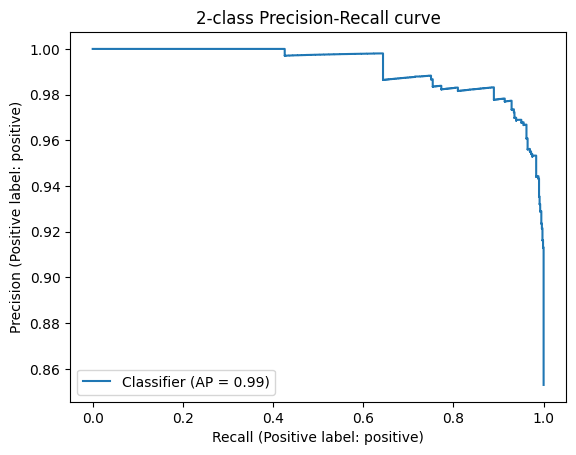

In [21]:
from openai.embeddings_utils import cosine_similarity, get_embedding
from sklearn.metrics import PrecisionRecallDisplay

def evaluate_embeddings_approach(
    labels = ['negative', 'positive'],
    model = EMBEDDING_MODEL,
):
    label_embeddings = [get_embedding(label, engine=model) for label in labels]

    def label_score(review_embedding, label_embeddings):
        return cosine_similarity(review_embedding, label_embeddings[1]) - cosine_similarity(review_embedding, label_embeddings[0])

    probas = df["embedding"].apply(lambda x: label_score(x, label_embeddings))
    preds = probas.apply(lambda x: 'positive' if x>0 else 'negative')

    report = classification_report(df.sentiment, preds)
    print(report)

    display = PrecisionRecallDisplay.from_predictions(df.sentiment, probas, pos_label='positive')
    _ = display.ax_.set_title("2-class Precision-Recall curve")

evaluate_embeddings_approach(labels=['negative', 'positive'], model=EMBEDDING_MODEL)

We can see that this classifier already performs extremely well. We used similarity embeddings, and the simplest possible label name. Let's try to improve on this by using more descriptive label names, and search embeddings.

              precision    recall  f1-score   support

    negative       0.98      0.73      0.84       136
    positive       0.96      1.00      0.98       789

    accuracy                           0.96       925
   macro avg       0.97      0.86      0.91       925
weighted avg       0.96      0.96      0.96       925



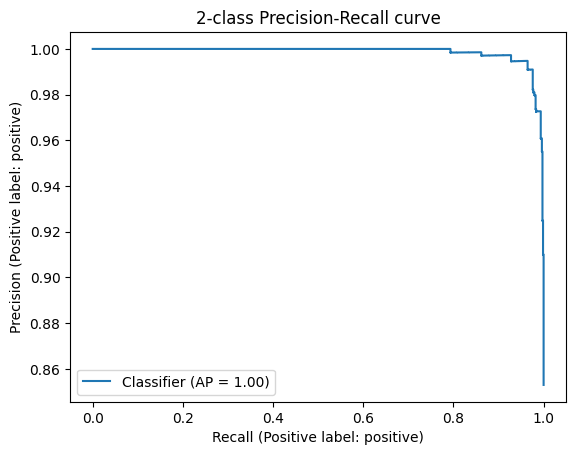

In [22]:
evaluate_embeddings_approach(labels=['An Amazon review with a negative sentiment.', 'An Amazon review with a positive sentiment.'])